In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import m_u, zero_Celsius
from scipy.constants import k as k_b

In [24]:
# Size of the box (m)
L = 100e-9
# Number of particles
N = 500
# Particle mass
m = 32 * m_u
# Temperature
T = 20 + zero_Celsius
# Time delta
dt = 1e-12
# How many iterations
iterations = 5000

time_array = np.linspace(0, dt*iterations, iterations)

In [25]:
# Determine initial positions
positions = np.zeros((N, iterations, 3))
positions[:, 0] = np.random.rand(N, 3) * L
# Determine initial velocities
velocities = np.zeros((N, iterations, 3))
velocities[:, 0] = np.random.normal(0, np.sqrt(k_b * T / m), (N, 3))

In [26]:
print(f'Average velocity: {np.mean(velocities[:, 0]):.3f}')

Average velocity: 8.995


In [27]:
# Momentum transfer array
momenta = np.zeros((N, iterations, 3))

for i in range(1, iterations):
    # Update the position
    positions[:, i] = positions[:, i - 1] + dt * velocities[:, i - 1]
    # Initially copy over velocities
    velocities[:, i] = velocities[:, i - 1]

    # Calculate momentum transfer
    momenta[:, i, 0] = np.where((positions[:, i, 0] > L) | (positions[:, i, 0] < 0), 2 * m * np.abs(velocities[:, i, 0]), 0)
    momenta[:, i, 1] = np.where((positions[:, i, 1] > L) | (positions[:, i, 1] < 0), 2 * m * np.abs(velocities[:, i, 1]), 0)
    momenta[:, i, 2] = np.where((positions[:, i, 2] > L) | (positions[:, i, 2] < 0), 2 * m * np.abs(velocities[:, i, 2]), 0)

    # Fix velocities, keeping bounces in mind.
    velocities[:, i, 0] = np.where((positions[:, i, 0] > L) | (positions[:, i, 0] < 0), -velocities[:, i, 0], velocities[:, i, 0])
    velocities[:, i, 1] = np.where((positions[:, i, 1] > L) | (positions[:, i, 1] < 0), -velocities[:, i, 1], velocities[:, i, 1])
    velocities[:, i, 2] = np.where((positions[:, i, 2] > L) | (positions[:, i, 2] < 0), -velocities[:, i, 2], velocities[:, i, 2])

    # Fix positions based on boundaries.
    positions[:, i, 0] = np.where(positions[:, i, 0] < 0, -1 * positions[:, i, 0], positions[:, i, 0])
    positions[:, i, 0] = np.where(positions[:, i, 0] > L, 2*L - positions[:, i, 0], positions[:, i, 0])

    positions[:, i, 1] = np.where(positions[:, i, 1] < 0, -1 * positions[:, i, 1], positions[:, i, 1])
    positions[:, i, 1] = np.where(positions[:, i, 1] > L, 2*L - positions[:, i, 1], positions[:, i, 1])

    positions[:, i, 2] = np.where(positions[:, i, 2] < 0, -1 * positions[:, i, 2], positions[:, i, 2])
    positions[:, i, 2] = np.where(positions[:, i, 2] > L, 2*L - positions[:, i, 2], positions[:, i, 2])

momenta = np.cumsum(np.sum(np.sum(momenta, axis=2), axis=0))

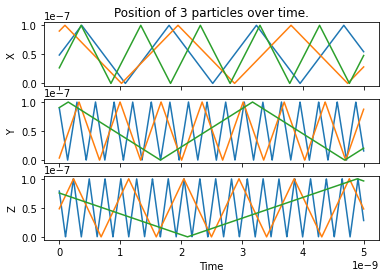

In [28]:
fix, axis = plt.subplots(3, 1, sharex='col')
for i in range(0, 3):
    axis[0].plot(time_array, positions[i, :, 0])
    axis[1].plot(time_array, positions[i, :, 1])
    axis[2].plot(time_array, positions[i, :, 2])

axis[0].set_ylabel('X')
axis[1].set_ylabel('Y')
axis[2].set_ylabel('Z')
axis[0].set_title('Position of 3 particles over time.')
axis[2].set_xlabel('Time')

plt.show()

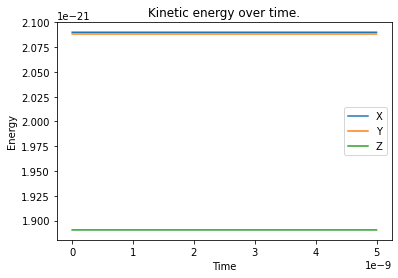

In [29]:
fix, axis = plt.subplots()
axis.plot(time_array, 0.5 * m * np.mean(np.square(velocities[:, :, 0]), axis=0), label='X')
axis.plot(time_array, 0.5 * m * np.mean(np.square(velocities[:, :, 1]), axis=0), label='Y')
axis.plot(time_array, 0.5 * m * np.mean(np.square(velocities[:, :, 2]), axis=0), label='Z')
axis.legend()
axis.set_title('Kinetic energy over time.')
axis.set_ylabel('Energy')
axis.set_xlabel('Time')

plt.show()

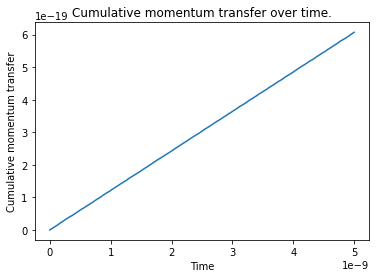

In [30]:
fix, axis = plt.subplots()
axis.plot(time_array, momenta)
axis.set_title('Cumulative momentum transfer over time.')
axis.set_ylabel('Cumulative momentum transfer')
axis.set_xlabel('Time')

plt.show()

In [31]:
average_force = momenta[-1] / time_array[-1]
print(f'Average force: {average_force:.3e}')

Average force: 1.215e-10


In [32]:
pressure = average_force / (6 * L ** 2)
print(f'Pressure: {pressure:.3e}')

Pressure: 2.024e+03
